Geoﬁzik ma'lumotlarning dastlabki qismi:
   Joylashuv   Seysmik  Gravitatsiya  Qarshilik
0     0.0000 -0.009355      9.808984   1.021140
1     0.1001  0.008841      9.835328   1.015177
2     0.2002  0.002957      9.835618   0.995799
3     0.3003  0.066776      9.772157   0.993478
4     0.4004  0.058730      9.691733   0.960963


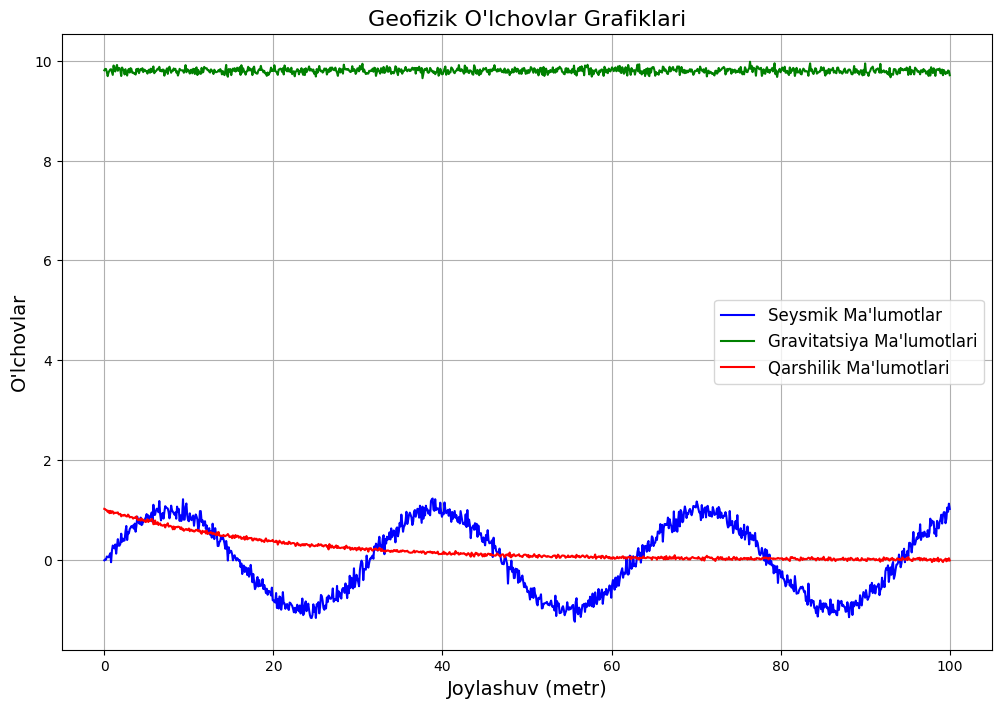

Xavfli zonalar:
      Joylashuv   Seysmik  Gravitatsiya  Qarshilik
4      0.400400  0.058730      9.691733   0.960963
20     2.002002  0.523617      9.694338   0.871286
25     2.502503  0.564963      9.831385   0.884870
26     2.602603  0.678032      9.768870   0.870403
28     2.802803  0.553383      9.806482   0.906335
..          ...       ...           ...        ...
995   99.599600  0.820878      9.766979  -0.029503
996   99.699700  1.045997      9.751336   0.014805
997   99.799800  0.962153      9.805987  -0.016293
998   99.899900  1.124916      9.795705   0.032263
999  100.000000  1.018977      9.710345  -0.012462

[862 rows x 4 columns]
Jami xavfli zonalar soni: 862


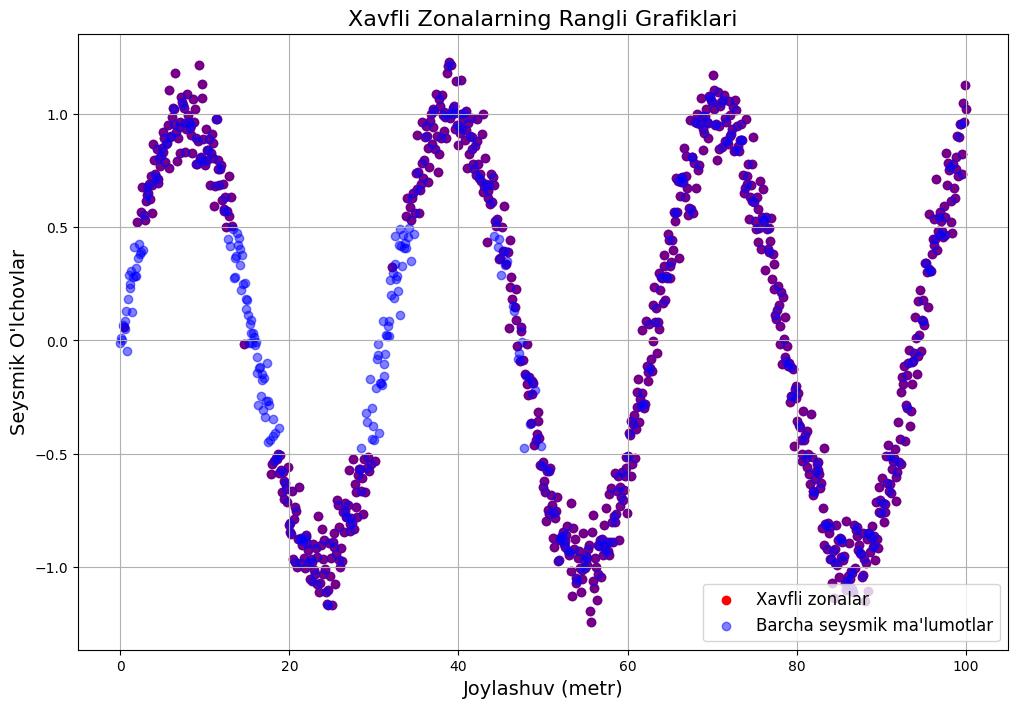

In [5]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Geoﬁzik Ma'lumotlarni Tayyorlash
x = np.linspace(0, 100, 1000)  # Joylashuv nuqtalari
seysmik_data = np.sin(x / 5) + np.random.normal(0, 0.1, len(x))  # Seysmik ma'lumotlar
gravimetrik_data = 9.8 + np.random.normal(0, 0.05, len(x))  # Gravimetrik ma'lumotlar
qarshilik_data = np.exp(-x / 20) + np.random.normal(0, 0.02, len(x))  # Elektr qarshilik

# Ma'lumotlarni jadvalga yig'ish
data = pd.DataFrame({
    'Joylashuv': x,
    'Seysmik': seysmik_data,
    'Gravitatsiya': gravimetrik_data,
    'Qarshilik': qarshilik_data
})

# Ma'lumotlarning bir qismini ko'rib chiqish
print("Geoﬁzik ma'lumotlarning dastlabki qismi:")
print(data.head())

# 2. Ma'lumotlarni Vizualizatsiya qilish (2D Grafiklar)
plt.figure(figsize=(12, 8))
plt.plot(data['Joylashuv'], data['Seysmik'], label='Seysmik Ma\'lumotlar', color='blue')
plt.plot(data['Joylashuv'], data['Gravitatsiya'], label='Gravitatsiya Ma\'lumotlari', color='green')
plt.plot(data['Joylashuv'], data['Qarshilik'], label='Qarshilik Ma\'lumotlari', color='red')
plt.xlabel('Joylashuv (metr)', fontsize=14)
plt.ylabel('O\'lchovlar', fontsize=14)
plt.title('Geoﬁzik O\'lchovlar Grafiklari', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()

# 3. Xavfli Zonalarning Aniqlanishi
chegara_seysmik = 0.5  # Seysmik harakatlar uchun chegara
chegara_gravitatsiya = 9.7  # Gravimetrik qiymatlar uchun chegara
chegara_qarshilik = 0.1  # Elektr qarshilik uchun chegara

# Xavfli zonalarni aniqlash
xavfli_zonalar = data[
    (abs(data['Seysmik']) > chegara_seysmik) |
    (data['Gravitatsiya'] < chegara_gravitatsiya) |
    (data['Qarshilik'] < chegara_qarshilik)
]

# Xavfli zonalar haqida ma'lumot chiqarish
print("Xavfli zonalar:")
print(xavfli_zonalar[['Joylashuv', 'Seysmik', 'Gravitatsiya', 'Qarshilik']])

# Xavfli zonalar sonini chiqarish
print(f"Jami xavfli zonalar soni: {len(xavfli_zonalar)}")

# 4. Xavfli Zonalarning Rangli Vizualizatsiyasi
plt.figure(figsize=(12, 8))
plt.scatter(xavfli_zonalar['Joylashuv'], xavfli_zonalar['Seysmik'], c='red', label='Xavfli zonalar')
plt.scatter(data['Joylashuv'], data['Seysmik'], c='blue', alpha=0.5, label='Barcha seysmik ma\'lumotlar')
plt.xlabel('Joylashuv (metr)', fontsize=14)
plt.ylabel('Seysmik O\'lchovlar', fontsize=14)
plt.title('Xavfli Zonalarning Rangli Grafiklari', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()
